# Imports

In [1]:
import logging
import os

import pandas as pd
import seaborn as sns

import core.config.config_ as cconconf
import helpers.dbg as hdbg
import helpers.env as henv
import helpers.printing as hprint
import helpers.s3 as hs3
import im_v2.common.universe.universe as imvcounun
import research_amp.cc.statistics as rccstat
import research_amp.cc.volume as rccvolu
import im_v2.ccxt.data.client.clients as imvcdclcl

import core.plotting as coplotti

In [2]:
hdbg.init_logger(verbosity=logging.INFO)

_LOG = logging.getLogger(__name__)

_LOG.info("%s", henv.get_system_signature()[0])

hprint.config_notebook()

INFO: > cmd='/venv/lib/python3.8/site-packages/ipykernel_launcher.py -f /home/.local/share/jupyter/runtime/kernel-2ecc1aa1-1502-4bd1-804f-fdd78c559a42.json'
>>ENV<<: is_inside_container=True: code_version=0, container_version=cmamp-1.0.0, is_inside_docker=True, is_inside_ci=False, CI_defined=True, CI=''
>>ENV<<: AM_AWS_PROFILE=True AM_ECR_BASE_PATH=True AM_S3_BUCKET=True AM_TELEGRAM_TOKEN=True AWS_ACCESS_KEY_ID=False AWS_DEFAULT_REGION=False AWS_SECRET_ACCESS_KEY=False GH_ACTION_ACCESS_TOKEN=True
# Git
    branch_name='CMTask587_propagate_universe_changes'
    hash='6c5711c72'
    # Last commits:
      *   6c5711c72 PomazkinG Merge branch 'master' into CMTask587_propagate_universe_changes   ( 3 minutes ago) Thu Nov 25 22:23:05 2021  (HEAD -> CMTask587_propagate_universe_changes)
      |\  
      * | 967699d8a PomazkinG remove import                                                     ( 3 minutes ago) Thu Nov 25 22:22:58 2021           
      * | db04c88b7 PomazkinG fix stats           

# Config

In [3]:
def get_cmtask260_config() -> cconconf.Config:
    """
    Get task260-specific config.
    """
    config = cconconf.Config()
    # Load parameters.
    config.add_subconfig("load")
    config["load"]["aws_profile"] = "am"
    config["load"]["data_dir"] = os.path.join(hs3.get_path(), "data")
    # Data parameters.
    config.add_subconfig("data")
    config["data"]["data_type"] = "OHLCV"
    config["data"]["universe_version"] = "v03"
    config["data"]["vendor"] = "CCXT"
    # Column names.
    config.add_subconfig("column_names")
    config["column_names"]["volume"] = "volume"
    config["column_names"]["currency_pair"] = "currency_pair"
    config["column_names"]["exchange"] = "exchange_id"
    config["column_names"]["close"] = "close"
    return config


config = get_cmtask260_config()
print(config)

load:
  aws_profile: am
  data_dir: s3://alphamatic-data/data
data:
  data_type: OHLCV
  universe_version: v03
  vendor: CCXT
column_names:
  volume: volume
  currency_pair: currency_pair
  exchange: exchange_id
  close: close


# Load the data

In [4]:
vendor_universe = imvcounun.get_vendor_universe(
    config["data"]["universe_version"], config["data"]["vendor"]
)
vendor_universe

['binance::ADA_USDT',
 'binance::AVAX_USDT',
 'binance::BNB_USDT',
 'binance::BTC_USDT',
 'binance::DOGE_USDT',
 'binance::EOS_USDT',
 'binance::ETH_USDT',
 'binance::LINK_USDT',
 'binance::SOL_USDT',
 'ftx::BNB_USDT',
 'ftx::BTC_USDT',
 'ftx::DOGE_USDT',
 'ftx::ETH_USDT',
 'ftx::LINK_USDT',
 'ftx::SOL_USDT',
 'ftx::XRP_USDT',
 'gateio::ADA_USDT',
 'gateio::AVAX_USDT',
 'gateio::BNB_USDT',
 'gateio::BTC_USDT',
 'gateio::DOGE_USDT',
 'gateio::EOS_USDT',
 'gateio::ETH_USDT',
 'gateio::FIL_USDT',
 'gateio::LINK_USDT',
 'gateio::SOL_USDT',
 'gateio::XRP_USDT',
 'kucoin::ADA_USDT',
 'kucoin::AVAX_USDT',
 'kucoin::BNB_USDT',
 'kucoin::BTC_USDT',
 'kucoin::DOGE_USDT',
 'kucoin::EOS_USDT',
 'kucoin::ETH_USDT',
 'kucoin::FIL_USDT',
 'kucoin::LINK_USDT',
 'kucoin::SOL_USDT',
 'kucoin::XRP_USDT']

In [5]:
compute_daily_cumul_volume_ = lambda data: rccvolu.get_daily_cumul_volume(
    data, config, is_notional_volume=False
)

cumul_daily_volume = rccstat.compute_stats_for_universe(
    vendor_universe, config, compute_daily_cumul_volume_
)

Reading CCXT data for exchange id='binance', currencies='ADA_USDT' from file='s3://alphamatic-data/data/ccxt/20210924/binance/ADA_USDT.csv.gz'...
Processing CCXT data for exchange id='binance', currencies='ADA_USDT'...
Index length increased by 4520 = 1622000 - 1617480
Reading CCXT data for exchange id='binance', currencies='AVAX_USDT' from file='s3://alphamatic-data/data/ccxt/20210924/binance/AVAX_USDT.csv.gz'...
Processing CCXT data for exchange id='binance', currencies='AVAX_USDT'...
Index length increased by 1224 = 517498 - 516274
Reading CCXT data for exchange id='binance', currencies='BNB_USDT' from file='s3://alphamatic-data/data/ccxt/20210924/binance/BNB_USDT.csv.gz'...
Processing CCXT data for exchange id='binance', currencies='BNB_USDT'...
Index length increased by 4520 = 1622295 - 1617775
Reading CCXT data for exchange id='binance', currencies='BTC_USDT' from file='s3://alphamatic-data/data/ccxt/20210924/binance/BTC_USDT.csv.gz'...
Processing CCXT data for exchange id='binan

Index length increased by 94496 = 1619786 - 1525290
Reading CCXT data for exchange id='kucoin', currencies='DOGE_USDT' from file='s3://alphamatic-data/data/ccxt/20210924/kucoin/DOGE_USDT.csv.gz'...
Processing CCXT data for exchange id='kucoin', currencies='DOGE_USDT'...
Index length=314817 has not changed
Reading CCXT data for exchange id='kucoin', currencies='EOS_USDT' from file='s3://alphamatic-data/data/ccxt/20210924/kucoin/EOS_USDT.csv.gz'...
Processing CCXT data for exchange id='kucoin', currencies='EOS_USDT'...
Index length increased by 232290 = 1621431 - 1389141
Reading CCXT data for exchange id='kucoin', currencies='ETH_USDT' from file='s3://alphamatic-data/data/ccxt/20210924/kucoin/ETH_USDT.csv.gz'...
Processing CCXT data for exchange id='kucoin', currencies='ETH_USDT'...
Index length increased by 117548 = 1619960 - 1502412
Reading CCXT data for exchange id='kucoin', currencies='FIL_USDT' from file='s3://alphamatic-data/data/ccxt/20210924/kucoin/FIL_USDT.csv.gz'...
Processing 

In [6]:
_LOG.info(
    "The number of (exchanges, currency pairs) =%s", cumul_daily_volume.shape[0]
)
cumul_daily_volume.head(3)

The number of (exchanges, currency pairs) =19629


,exchange_id,currency_pair,date,volume,vendor
0,binance,ADA_USDT,2018-08-16,36785174.6,CCXT
1,binance,ADA_USDT,2018-08-17,260602766.5,CCXT
2,binance,ADA_USDT,2018-08-18,166586335.9,CCXT


# Compute total volume per exchange

exchange_id
binance    2.386714e+12
kucoin     8.298311e+10
ftx        4.859575e+10
gateio     1.790395e+10
Name: volume, dtype: float64


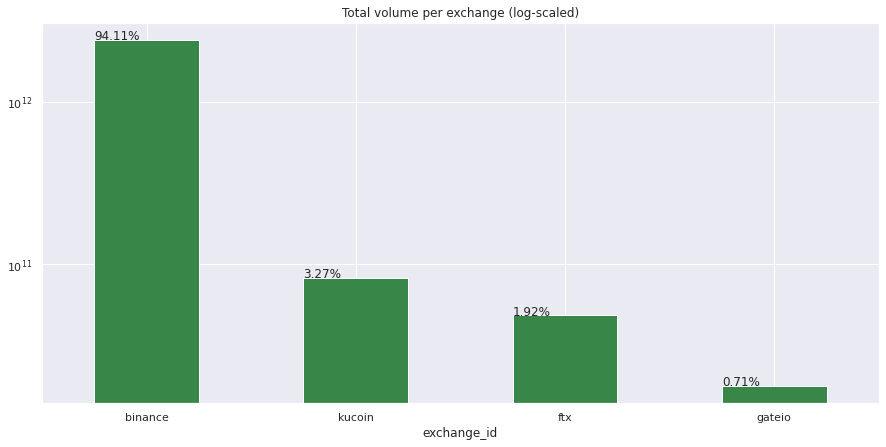

In [7]:
total_volume_by_exchange = rccvolu.get_total_exchange_volume(
    cumul_daily_volume, config, avg_daily=False
)
print(total_volume_by_exchange)

# Compute total volume per currency

currency_pair
DOGE_USDT    2.028142e+12
ADA_USDT     3.799040e+11
XRP_USDT     3.374002e+10
BTC_USDT     2.721637e+10
EOS_USDT     2.108024e+10
ETH_USDT     1.987232e+10
LINK_USDT    1.032285e+10
BNB_USDT     7.497330e+09
SOL_USDT     5.676799e+09
AVAX_USDT    1.719189e+09
FIL_USDT     1.025434e+09
Name: volume, dtype: float64


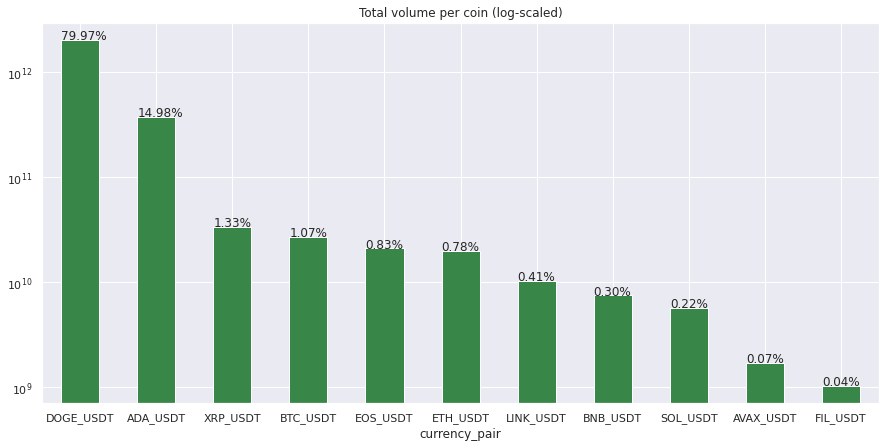

In [8]:
total_volume_by_coins = rccvolu.get_total_coin_volume(
    cumul_daily_volume, config, avg_daily=False
)
print(total_volume_by_coins)

# Rolling Plots

## By exchange

     exchange_id        date        volume  rolling_volume
0        binance  2018-08-16  3.983483e+07             NaN
1        binance  2018-08-17  2.785477e+08             NaN
2        binance  2018-08-18  1.749467e+08             NaN
3        binance  2018-08-19  1.327497e+08             NaN
4        binance  2018-08-20  1.615476e+08             NaN
...          ...         ...           ...             ...
2884      kucoin  2021-09-11  1.763054e+08    2.210660e+08
2885      kucoin  2021-09-12  1.926238e+08    2.219051e+08
2886      kucoin  2021-09-13  1.932818e+08    2.229066e+08
2887      kucoin  2021-09-14  1.306517e+08    2.229543e+08
2888      kucoin  2021-09-15  7.306304e+07    2.228776e+08

[2889 rows x 4 columns]


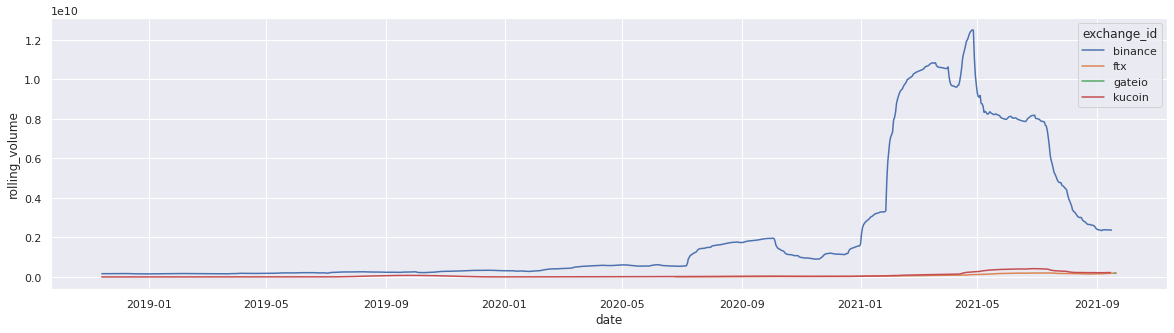

In [9]:
rolling_volume_per_exchange = rccvolu.get_rolling_volume_per_exchange(
    cumul_daily_volume, config, window=90
)
print(rolling_volume_per_exchange)

## By coins

     currency_pair        date        volume  rolling_volume
0         ADA_USDT  2018-08-16  3.678517e+07             NaN
1         ADA_USDT  2018-08-17  2.606028e+08             NaN
2         ADA_USDT  2018-08-18  1.665863e+08             NaN
3         ADA_USDT  2018-08-19  1.256888e+08             NaN
4         ADA_USDT  2018-08-20  1.484363e+08             NaN
...            ...         ...           ...             ...
9600      XRP_USDT  2021-09-17  2.225229e+07    9.356634e+07
9601      XRP_USDT  2021-09-18  1.286638e+07    9.314457e+07
9602      XRP_USDT  2021-09-19  2.317895e+07    9.189960e+07
9603      XRP_USDT  2021-09-20  4.234616e+07    9.067459e+07
9604      XRP_USDT  2021-09-21  8.289725e+06    8.957022e+07

[9605 rows x 4 columns]


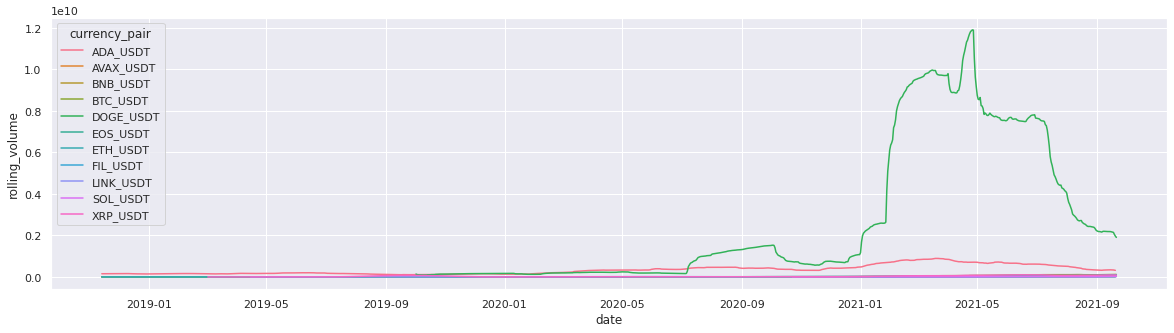

In [10]:
rolling_volume_per_coin = rccvolu.get_rolling_volume_per_coin(
    cumul_daily_volume, config, window=90
)
print(rolling_volume_per_coin)

# Compare weekday volumes

weekday
Thursday     4.825185e+11
Friday       3.766262e+11
Sunday       3.634226e+11
Saturday     3.534757e+11
Wednesday    3.383253e+11
Monday       3.128843e+11
Tuesday      3.089442e+11
Name: volume, dtype: float64


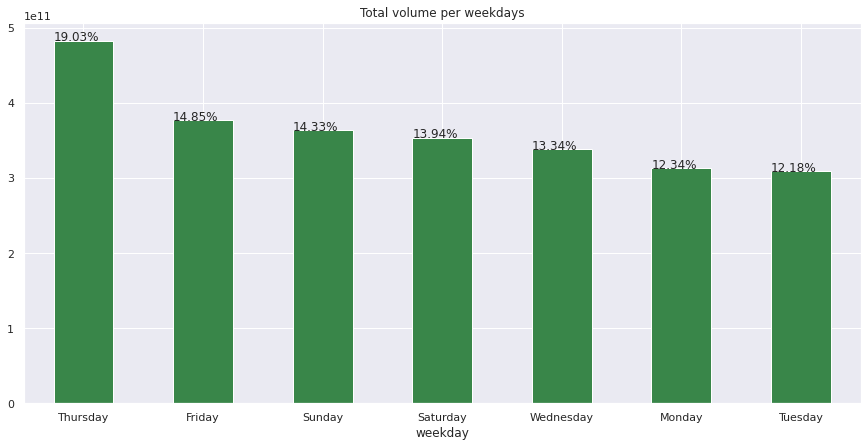

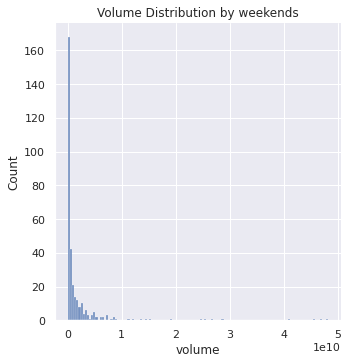

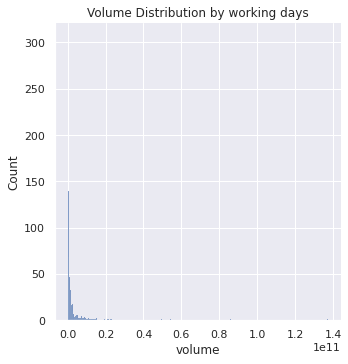

In [11]:
total_volume_by_weekdays = rccvolu.compare_weekday_volumes(
    cumul_daily_volume, config
)
print(total_volume_by_weekdays)

# Compare ATH volumes

## Functions

In [12]:
def get_initial_df_with_volumes(coins, exchange, is_notional_volume):
    """
    Return DataFrame with the volume of all coins for exchange with initial timestamps
    Parameters: list of coins, exchange name
    """
    result = []
    loader = imvcdclcl.CcxtFileSystemClient(
        data_type="OHLCV",
        root_dir=os.path.join(hs3.get_path(), "data"),
        aws_profile="am",
    )
    for coin in coins:
        # TODO(Grisha): use `_` as currencies separator #579.
        coin = coin.replace("/", "_")
        # TODO(Grisha): use `FullSymbols` #587.
        full_symbol = f"{exchange}::{coin}"
        df = loader.read_data(full_symbol)
        if is_notional_volume:
            df["volume"] = df["volume"] * df["close"]
        result.append(df["volume"])
    final_result = pd.concat(result, axis=1)
    return final_result


def plot_ath_volumes_comparison(df_list):
    """
    Return the graph with the comparison of average minute total trading volume
    in ATH vs.

    non-ATH
    Parameters: dataframe with volumes from a given exchange
    """
    plot_df = []
    for df in df_list:
        df_ath = df.iloc[df.index.indexer_between_time("09:30", "16:00")]
        df_not_ath = df.loc[~df.index.isin(df_ath.index)]
        ath_stat = pd.DataFrame()
        ath_stat.loc[df.name, f"minute_avg_total_volume_ath_{df.name}"] = (
            df_ath.sum().sum() / df_ath.shape[0]
        )
        ath_stat.loc[df.name, f"minute_avg_total_volume_not_ath_{df.name}"] = (
            df_not_ath.sum().sum() / df_not_ath.shape[0]
        )
        plot_df.append(ath_stat)
    plot_df = pd.concat(plot_df)
    plot_df.plot.bar(figsize=(15, 7), logy=True)

## Load the data

In [13]:
# get the list of all coin paires for each exchange
binance_coins = imvcounun.get_trade_universe("v03")["CCXT"]["binance"]
ftx_coins = imvcounun.get_trade_universe("v03")["CCXT"]["ftx"]
gateio_coins = imvcounun.get_trade_universe("v03")["CCXT"]["gateio"]
kucoin_coins = imvcounun.get_trade_universe("v03")["CCXT"]["kucoin"]

# load all the dataframes
binance_1 = get_initial_df_with_volumes(
    binance_coins, "binance", is_notional_volume=True
)
ftx_1 = get_initial_df_with_volumes(ftx_coins, "ftx", is_notional_volume=True)
gateio_1 = get_initial_df_with_volumes(
    gateio_coins, "gateio", is_notional_volume=True
)
kucoin_1 = get_initial_df_with_volumes(
    kucoin_coins, "kucoin", is_notional_volume=True
)

# supportive variables
exchange_list = [binance_1, ftx_1, gateio_1, kucoin_1]
binance_1.name = "binance"
ftx_1.name = "ftx"
gateio_1.name = "gateio"
kucoin_1.name = "kucoin"

Reading CCXT data for exchange id='binance', currencies='ADA_USDT' from file='s3://alphamatic-data/data/ccxt/20210924/binance/ADA_USDT.csv.gz'...
Processing CCXT data for exchange id='binance', currencies='ADA_USDT'...
Index length increased by 4520 = 1622000 - 1617480
Reading CCXT data for exchange id='binance', currencies='AVAX_USDT' from file='s3://alphamatic-data/data/ccxt/20210924/binance/AVAX_USDT.csv.gz'...
Processing CCXT data for exchange id='binance', currencies='AVAX_USDT'...
Index length increased by 1224 = 517498 - 516274
Reading CCXT data for exchange id='binance', currencies='BNB_USDT' from file='s3://alphamatic-data/data/ccxt/20210924/binance/BNB_USDT.csv.gz'...
Processing CCXT data for exchange id='binance', currencies='BNB_USDT'...
Index length increased by 4520 = 1622295 - 1617775
Reading CCXT data for exchange id='binance', currencies='BTC_USDT' from file='s3://alphamatic-data/data/ccxt/20210924/binance/BTC_USDT.csv.gz'...
Processing CCXT data for exchange id='binan

Index length increased by 94496 = 1619786 - 1525290
Reading CCXT data for exchange id='kucoin', currencies='DOGE_USDT' from file='s3://alphamatic-data/data/ccxt/20210924/kucoin/DOGE_USDT.csv.gz'...
Processing CCXT data for exchange id='kucoin', currencies='DOGE_USDT'...
Index length=314817 has not changed
Reading CCXT data for exchange id='kucoin', currencies='EOS_USDT' from file='s3://alphamatic-data/data/ccxt/20210924/kucoin/EOS_USDT.csv.gz'...
Processing CCXT data for exchange id='kucoin', currencies='EOS_USDT'...
Index length increased by 232290 = 1621431 - 1389141
Reading CCXT data for exchange id='kucoin', currencies='ETH_USDT' from file='s3://alphamatic-data/data/ccxt/20210924/kucoin/ETH_USDT.csv.gz'...
Processing CCXT data for exchange id='kucoin', currencies='ETH_USDT'...
Index length increased by 117548 = 1619960 - 1502412
Reading CCXT data for exchange id='kucoin', currencies='FIL_USDT' from file='s3://alphamatic-data/data/ccxt/20210924/kucoin/FIL_USDT.csv.gz'...
Processing 

## Plot

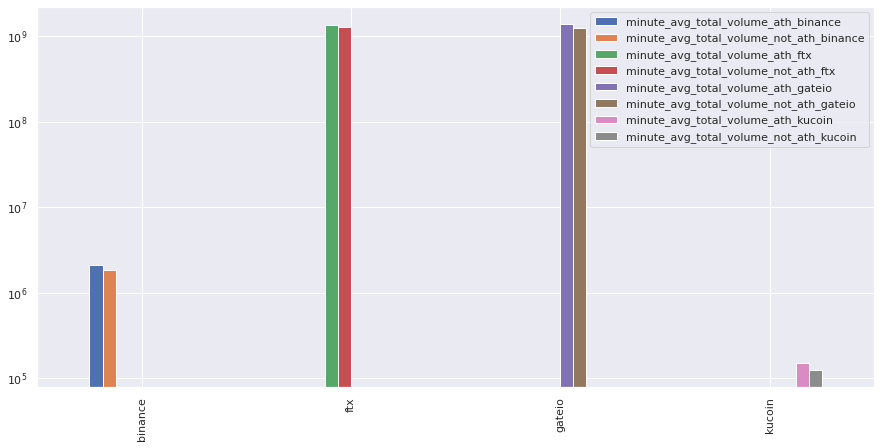

In [14]:
plot_ath_volumes_comparison(exchange_list)